# **PROJETO DE DATA SCIENCE**
#**Qualidade do Sono (2/2): Machine Learning**

O Conjunto de Dados sobre Saúde e Estilo de Vida do Sono consiste em 400 linhas e 13 colunas, abrangendo uma ampla gama de variáveis relacionadas ao sono e hábitos diários. Inclui detalhes como gênero, idade, ocupação, duração do sono, qualidade do sono, nível de atividade física, níveis de estresse, categoria de IMC, pressão arterial, frequência cardíaca, passos diários e a presença ou ausência de distúrbios do sono.

**Principais Recursos do Conjunto de Dados:**

* Métricas Abrangentes de Sono: Explore a duração do sono, qualidade e fatores que influenciam os padrões de sono.

* Fatores de Estilo de Vida: Analise os níveis de atividade física, níveis de estresse e categorias de IMC.

* Saúde Cardiovascular: Examine as medições de pressão arterial e frequência cardíaca.

* Análise de Distúrbios do Sono: Identifique a ocorrência de distúrbios do sono, como Insônia e Apneia do Sono.

**Colunas do Conjunto de Dados:**

* ID da Pessoa: Um identificador para cada indivíduo.
* Gênero: O gênero da pessoa (Masculino/Feminino).
* Idade: A idade da pessoa em anos.
* Ocupação: A ocupação ou profissão da pessoa.
* Duração do Sono (horas): O número de horas que a pessoa dorme por dia.
* Qualidade do Sono (escala: 1-10): Uma classificação subjetiva da qualidade do sono, variando de 1 a 10.
* Nível de Atividade Física (minutos/dia): O número de minutos que a pessoa se dedica à atividade física diariamente.
* Nível de Estresse (escala: 1-10): Uma classificação subjetiva do nível de estresse experimentado pela pessoa, variando de 1 a 10.
* Categoria de IMC: A categoria de IMC da pessoa (por exemplo, Abaixo do Peso, Normal, Sobrepeso).
* Pressão Arterial (sistólica/diastólica): A medida da pressão arterial da pessoa, indicada como pressão sistólica sobre pressão diastólica.
* Frequência Cardíaca (bpm): A frequência cardíaca de repouso da pessoa em batimentos por minuto.
* Passos Diários: O número de passos que a pessoa dá por dia.
* Distúrbio do Sono: A presença ou ausência de um distúrbio do sono na pessoa (Nenhum, Insônia, Apneia do Sono).

**Detalhes sobre a Coluna de Distúrbio do Sono:**

* Nenhum: O indivíduo não apresenta nenhum distúrbio do sono específico.
* Insônia: O indivíduo tem dificuldade para dormir ou permanecer dormindo, resultando em sono inadequado ou de má qualidade.
* Apneia do Sono: O indivíduo sofre pausas na respiração durante o sono, resultando em padrões de sono interrompidos e potenciais riscos à saúde.

**Link de acesso no kaggle:**
 <https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data>

#**Importando Pacotes**

In [ ]:
!pip install pandas-flavor==0.1.1
!pip install -U pingouin
import math
import pandas as pd
import pandas_flavor as pf
import numpy as np
from numpy.testing import suppress_warnings
import numpy.linalg
import numpy.linalg._umath_linalg
#import numpy.linalg._umath_linalg._ilp64
import pingouin as pg
import sklearn
import scipy.stats as sct
from scipy.stats import norm
#from numpy.testing import suppr
from scipy import constants
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 2.8 MB/s eta 0:00:00


In [ ]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold # KFold Class.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

#**Importando o Banco de Dados**

In [ ]:
df_sleep = pd.read_csv('/content/drive/MyDrive/Projeto_Tomorrow/Sleep_health_and_lifestyle_dataset.csv')
df_sleep

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


#**Tratamento Preliminar dos Dados**

### Dados faltantes

In [ ]:
df_sleep.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [ ]:
df_sleep['Sleep Disorder'] = df_sleep['Sleep Disorder'].fillna(value = 'Normal')
df_sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
#Deletando a colunas desnecessária 'Person ID'
df_sleep.drop(columns=['Person ID'], inplace=True)

### Tratando a coluna 'BMI Category'

In [ ]:
print(df_sleep['BMI Category'].unique())

['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [ ]:
df_sleep['BMI Category'] = df_sleep['BMI Category'].replace({'Normal Weight': 'Normal'})
print(df_sleep['BMI Category'].unique())

['Overweight' 'Normal' 'Obese']


Transformando as categorias de IMC em variáveis numéricas:

* 'Normal': 0
* 'Obeso': 1
* 'Sobrepeso': 2

In [ ]:
category_mapping = {'Normal': 0, 'Overweight': 1, 'Obese': 2}

df_sleep['BMI Category'] = df_sleep['BMI Category'].map(category_mapping)

In [ ]:
df_sleep['BMI Category'].unique()

array([1, 0, 2])

### Transformando a variável categórica'Gender' em uma variável numérica

In [ ]:
category_mapping = {'Male': 0, 'Female': 1}

df_sleep['Gender'] = df_sleep['Gender'].map(category_mapping)

In [ ]:
df_sleep['Gender'].unique()

array([0, 1])

### Criando uma variável categórica para classificar a pressão:

* (0) Normal - se 'Sistolic Pressure' estiver entre [120-129] e 'Diastolic Pressure' estiver entre [80, 94]

* (1) Anormal - caso contrário

In [ ]:
#Dividindo a coluna 'Blood Pressure' em 'Systolic Pressure' e 'Diastolic Pressure'
df_sleep[['Systolic Pressure', 'Diastolic Pressure']] = df_sleep['Blood Pressure'].str.split('/', expand=True)

In [ ]:
#Convertendo as colunas criadas para o tipo int
df_sleep['Systolic Pressure'] = df_sleep['Systolic Pressure'].astype(int)
df_sleep['Diastolic Pressure'] = df_sleep['Diastolic Pressure'].astype(int)

In [ ]:
#Criando uma coluna booleana para auxiliar na classificação
df_sleep['is_normal'] = (df_sleep['Systolic Pressure'].between(120, 129)) & (df_sleep['Diastolic Pressure'].between(80, 94))

In [ ]:
#Utilizando a função map para mapear e substituir os valores na coluna 'Blood Pressure': 0 - pressão norma; 1 - pressão anormal
df_sleep['Blood Pressure'] = df_sleep['is_normal'].map({True: 0, False: 1})

In [ ]:
#Deletando as colunas desnecessárias
df_sleep.drop(columns=['is_normal'], inplace=True)

### Transformando 'Occupation' em uma variável numérica com LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

df_sleep['Occupation'] = label_encoder.fit_transform(df_sleep['Occupation'])

In [ ]:
df_sleep['Occupation'].unique()

array([ 9,  1,  6, 10,  5,  2,  0,  8,  3,  7,  4])

### Transformando a coluna 'Sleep Disorder' em uma variável numérica

In [ ]:
category_mapping = {'Normal': 0, 'Sleep Apnea': 1, 'Insomnia':2}

df_sleep['Sleep Disorder'] = df_sleep['Sleep Disorder'].map(category_mapping)

In [ ]:
df_sleep['Sleep Disorder'].unique()

array([0, 1, 2])

### Conferindo a base de dados

In [ ]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int64  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Blood Pressure           374 non-null    int64  
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    int64  
 12  Systolic Pressure        374 non-null    int64  
 13  Diastolic Pressure       374 non-null    int64  
dtypes: float64(1), int64(13)
m

A base agora só tem dados do tipo 'int' ou 'float'

# **Machine Learning**

## **Identificando X (variáveis independentes) e Y (variável dependente)**

In [ ]:
X = df_sleep.drop(columns='Sleep Disorder')
Y = df_sleep['Sleep Disorder']

##**Separando os Dados de Teste e Treinamento**

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.20, random_state=7)

## **Criando uma Lista dos Modelos de Classificação Que Serão Avaliados**

In [ ]:
models = []

models.append(LogisticRegression(solver='liblinear', multi_class='ovr'))
models.append(LinearDiscriminantAnalysis())
models.append(KNeighborsClassifier())
models.append(DecisionTreeClassifier())
models.append(GaussianNB())
models.append(SVC(gamma='auto'))

In [ ]:
#Lista com a abreviação do nome dos modelos
nome = ['LR','LDA','KNN','DT','NB','SVM']

## **Aplicando os Modelos Supervisionados Selecionados**

In [ ]:
results = [] #lista com os resultados de cada modelo
acuracia=[]
erro=[]
n=0

for model in models:
   Models_results = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
   results.append(Models_results)
   msg = "%s: %f (%f)" % (nome[n],round(Models_results.mean(),2), Models_results.std())
   acuracia.append(round(Models_results.mean(),2))
   erro.append(Models_results.std())
   n=n+1
   print(msg)

LR: 0.890000 (0.104373)
LDA: 0.870000 (0.126052)
KNN: 0.760000 (0.152586)
DT: 0.650000 (0.150914)
NB: 0.880000 (0.109603)
SVM: 0.760000 (0.162310)


## **Avaliando o Modelo Graficamente**

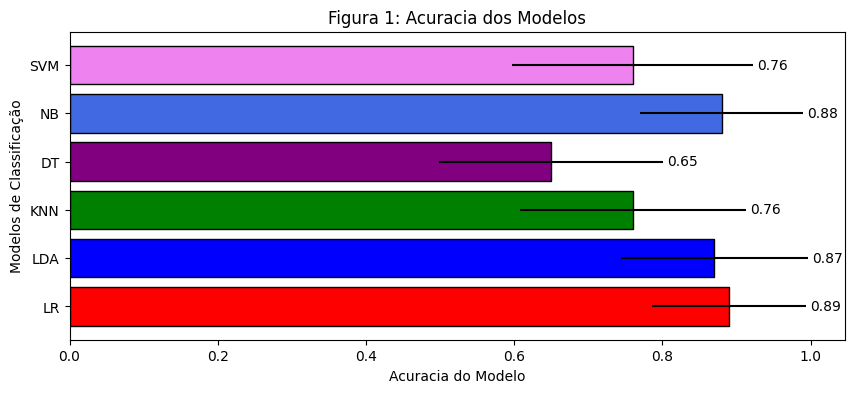

In [ ]:
plt.figure(figsize = (10,4))
plt.title('Figura 1: Acuracia dos Modelos')

barWidth=0.15

r=np.arange(len(nome))
a=plt.barh(nome, acuracia, color=['red','blue','g','purple','royalblue','violet'], xerr= erro, edgecolor='black')


plt.bar_label(a, padding=3)

# Adicionando Legendas as Barras
plt.ylabel('Modelos de Classificação')
plt.xlabel('Acuracia do Modelo')

plt.show()

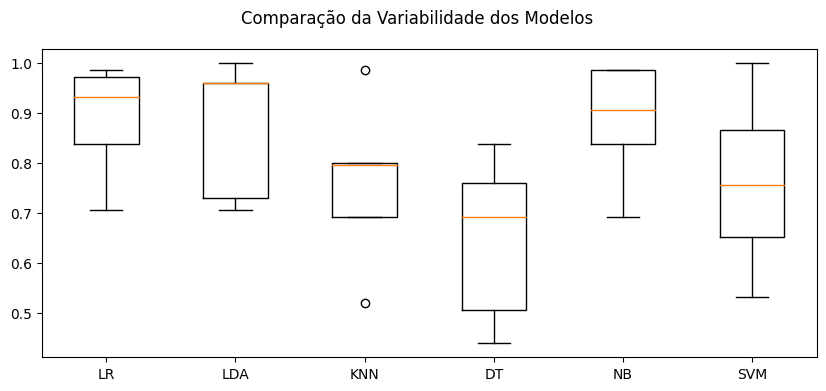

In [ ]:
fig = plt.figure(figsize = (10,4))
fig.suptitle('Comparação da Variabilidade dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(nome)
plt.show()

**Interpretação**

Os modelos de Linear Discriminant Analysis (87%), Naive Bayes (88%) e Logistic Regression (89%) apresentaram maiores acurácias dentre todos os modelos testados.

Contudo, analisando o Boxplot desses modelos, percebemos que o LR e LDA apresentaram menores variações na previsão dos resultados

Vamos aprofundar a análise a seguir:

## **Avaliação dos Modelos com Melhor Acurária**

### **Modelo de Regressão Logística**

In [ ]:
logistic_model = LogisticRegression(solver='liblinear', multi_class='ovr')

# Criando a validação cruzada estratificada para garantir que cada subdivisão do conjunto de dados tenha a mesma proporção de cada classe
cv = StratifiedKFold(n_splits=5)

# Realizando a validação cruzada
scores = cross_val_score(logistic_model, X_train, Y_train, cv=cv, scoring='accuracy')
print(f'Validação cruzada - Acurácia média: {scores.mean():.4f}, Desvio padrão: {scores.std():.4f}')

# Treinando o modelo com o conjunto de treino completo
logistic_model.fit(X_train, Y_train)

# Avaliação do Modelo
Previsao_lr = logistic_model.predict(X_test)

# Relatório de classificação
print('Relatório de Classificação - Regressão Logística: \n', classification_report(Y_test, Previsao_lr))

# Matriz de confusão
matriz_confusao = confusion_matrix(Y_test, Previsao_lr)
print('Matriz de Confusão:\n', matriz_confusao)

Validação cruzada - Acurácia média: 0.9064, Desvio padrão: 0.0358
Relatório de Classificação - Regressão Logística: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        35
           1       0.84      0.76      0.80        21
           2       0.75      0.79      0.77        19

    accuracy                           0.87        75
   macro avg       0.85      0.84      0.84        75
weighted avg       0.87      0.87      0.87        75

Matriz de Confusão:
 [[34  1  0]
 [ 0 16  5]
 [ 2  2 15]]


**Interpretação**

* Acurácia média com validação cruzada: 90,6%

* O modelo apresenta uma boa acurácia geral de 87%, sugerindo que é eficaz na classificação correta dos distúrbios de sono.

* O modelo tem precisão maior com a classe (0 - normal), mas o desempenho diminui para as classes  (1 - apneia e 2 - insônia).

*Matriz de confusão:*


1. Classe 0 (Normal):

- 34 foram corretamente classificados como 0 (True Positives - TP);

- 1 foi incorretamente classificado como 1 (False Negatives - FN);

- 0 foi incorretamente classificado como 2 (False Negatives - FN)

2. Classe 1 (Apneia):

- 16 foram corretamente classificados como 1 (True Positives - TP);

- 0 foram incorretamente classificados como 0 (False Negatives - FN);

- 5 foram incorretamente classificados como 2 (False Positives - FP)

3. Classe 2 (Insônia):

- 15 foram corretamente classificados como 2 (True Positives - TP);

- 2 foram incorretamente classificados como 0 (False Positives - FP);

- 2 foram incorretamente classificados como 1 (False Positives - FP)




### **Análise Discriminante**

In [ ]:
lda_model = LinearDiscriminantAnalysis()

# Criando a validação cruzada estratificada
cv = StratifiedKFold(n_splits=5)

# Realizando a validação cruzada
scores = cross_val_score(lda_model, X_train, Y_train, cv=cv, scoring='accuracy')
print(f'Validação cruzada - Acurácia média: {scores.mean():.4f}, Desvio padrão: {scores.std():.4f}')

# Treinando o modelo com o conjunto de treino completo
lda_model.fit(X_train, Y_train)

# Avaliação do Modelo
Previsao_lda = lda_model.predict(X_test)

# Relatório de classificação
print('Relatório de Classificação - Regressão Logística: \n', classification_report(Y_test, Previsao_lda))

# Matriz de confusão
matriz_confusao = confusion_matrix(Y_test, Previsao_lda)
print('Matriz de Confusão:\n', matriz_confusao)

Validação cruzada - Acurácia média: 0.8962, Desvio padrão: 0.0389
Relatório de Classificação - Regressão Logística: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        35
           1       0.84      0.76      0.80        21
           2       0.75      0.79      0.77        19

    accuracy                           0.87        75
   macro avg       0.85      0.84      0.84        75
weighted avg       0.87      0.87      0.87        75

Matriz de Confusão:
 [[34  1  0]
 [ 0 16  5]
 [ 2  2 15]]


**Interpretação**

* Acurácia média com validação cruzada: 89,6%

* O modelo apresenta uma boa acurácia geral de 87%, sugerindo que é eficaz na classificação correta dos distúrbios de sono.

* O modelo parece lidar bem com a classe (0 - normal), mas o desempenho diminui para as classes  (1 - apneia e 2 - insônia).

*Matriz de confusão:*


1. Classe 0 (Normal):

- 34 foram corretamente classificados como 0 (True Positives - TP);

- 1 foi incorretamente classificado como 1 (False Negatives - FN);

- 0 foi incorretamente classificado como 2 (False Negatives - FN)

2. Classe 1 (Apneia):

- 16 foram corretamente classificados como 1 (True Positives - TP);

- 0 foram incorretamente classificados como 0 (False Negatives - FN);

- 5 foram incorretamente classificados como 2 (False Positives - FP)

3. Classe 2 (Insônia):

- 15 foram corretamente classificados como 2 (True Positives - TP);

- 2 foram incorretamente classificados como 0 (False Positives - FP);

- 2 foram incorretamente classificados como 1 (False Positives - FP)

### **Modelo Naive Bayes**

In [ ]:
nb_model = GaussianNB()

# Criando a validação cruzada estratificada
cv = StratifiedKFold(n_splits=5)

# Realizando a validação cruzada
scores = cross_val_score(nb_model, X_train, Y_train, cv=cv, scoring='accuracy')
print(f'Validação cruzada - Acurácia média: {scores.mean():.4f}, Desvio padrão: {scores.std():.4f}')

# Treinando o modelo com o conjunto de treino completo
nb_model.fit(X_train, Y_train)

# Avaliação do Modelo
Previsao_nb = nb_model.predict(X_test)

# Relatório de classificação
print('Relatório de Classificação - Regressão Logística: \n', classification_report(Y_test, Previsao_nb))

# Matriz de confusão
matriz_confusao = confusion_matrix(Y_test, Previsao_nb)
print('Matriz de Confusão:\n', matriz_confusao)

Validação cruzada - Acurácia média: 0.8962, Desvio padrão: 0.0443
Relatório de Classificação - Regressão Logística: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        35
           1       0.85      0.81      0.83        21
           2       0.79      0.79      0.79        19

    accuracy                           0.88        75
   macro avg       0.86      0.86      0.86        75
weighted avg       0.88      0.88      0.88        75

Matriz de Confusão:
 [[34  1  0]
 [ 0 17  4]
 [ 2  2 15]]


**Interpretação**

* Acurácia média com validação cruzada: 89,6%

* O modelo apresenta uma boa acurácia geral de 88%, sugerindo que é eficaz na classificação correta dos distúrbios de sono.

* O modelo tem precisão maior com a classe (0 - normal), mas o desempenho diminui para as classes  (1 - apneia e 2 - insônia).

*Matriz de confusão:*


1. Classe 0 (Normal):

- 34 foram corretamente classificados como 0 (True Positives - TP);

- 1 foi incorretamente classificado como 1 (False Negatives - FN);

- 0 foi incorretamente classificado como 2 (False Negatives - FN)

2. Classe 1 (Apneia):

- 17 foram corretamente classificados como 1 (True Positives - TP);

- 0 foram incorretamente classificados como 0 (False Negatives - FN);

- 4 foram incorretamente classificados como 2 (False Positives - FP)

3. Classe 2 (Insônia):

- 15 foram corretamente classificados como 2 (True Positives - TP);

- 2 foram incorretamente classificados como 0 (False Positives - FP);

- 2 foram incorretamente classificados como 1 (False Positives - FP)

## **Conclusão**

Os modelos de Regressão Logística (RL), Análise de Discriminante (AD) e Naive Bayes (NB) apresentaram as maiores acurácias na primeira análise. Após uma avaliação com validação cruzada, notou-se uma leve melhora na acurácia média do modelo de Regressão Logística em comparação aos demais. Ademais, a LR apresentou menor variabilidade na previsão dos resultados.

A matriz de confusão dos modelos foi muito semelhante, não apresentando diferença significativa na especificidade e sensibilidade desses três modelos analisados.

Observando todos esses fatores, o modelo da Regressão Logística é o mais indicado para classificar essa base de dados.
